# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('previsao_de_renda.csv')

# Exibir as primeiras linhas e informações gerais para uma primeira inspeção
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

print("\nInformações gerais do DataFrame:")
df.info()

print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())

Primeiras 5 linhas do DataFrame:
   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_resid


Gerando Matriz de Dispersão (Pairplot)...


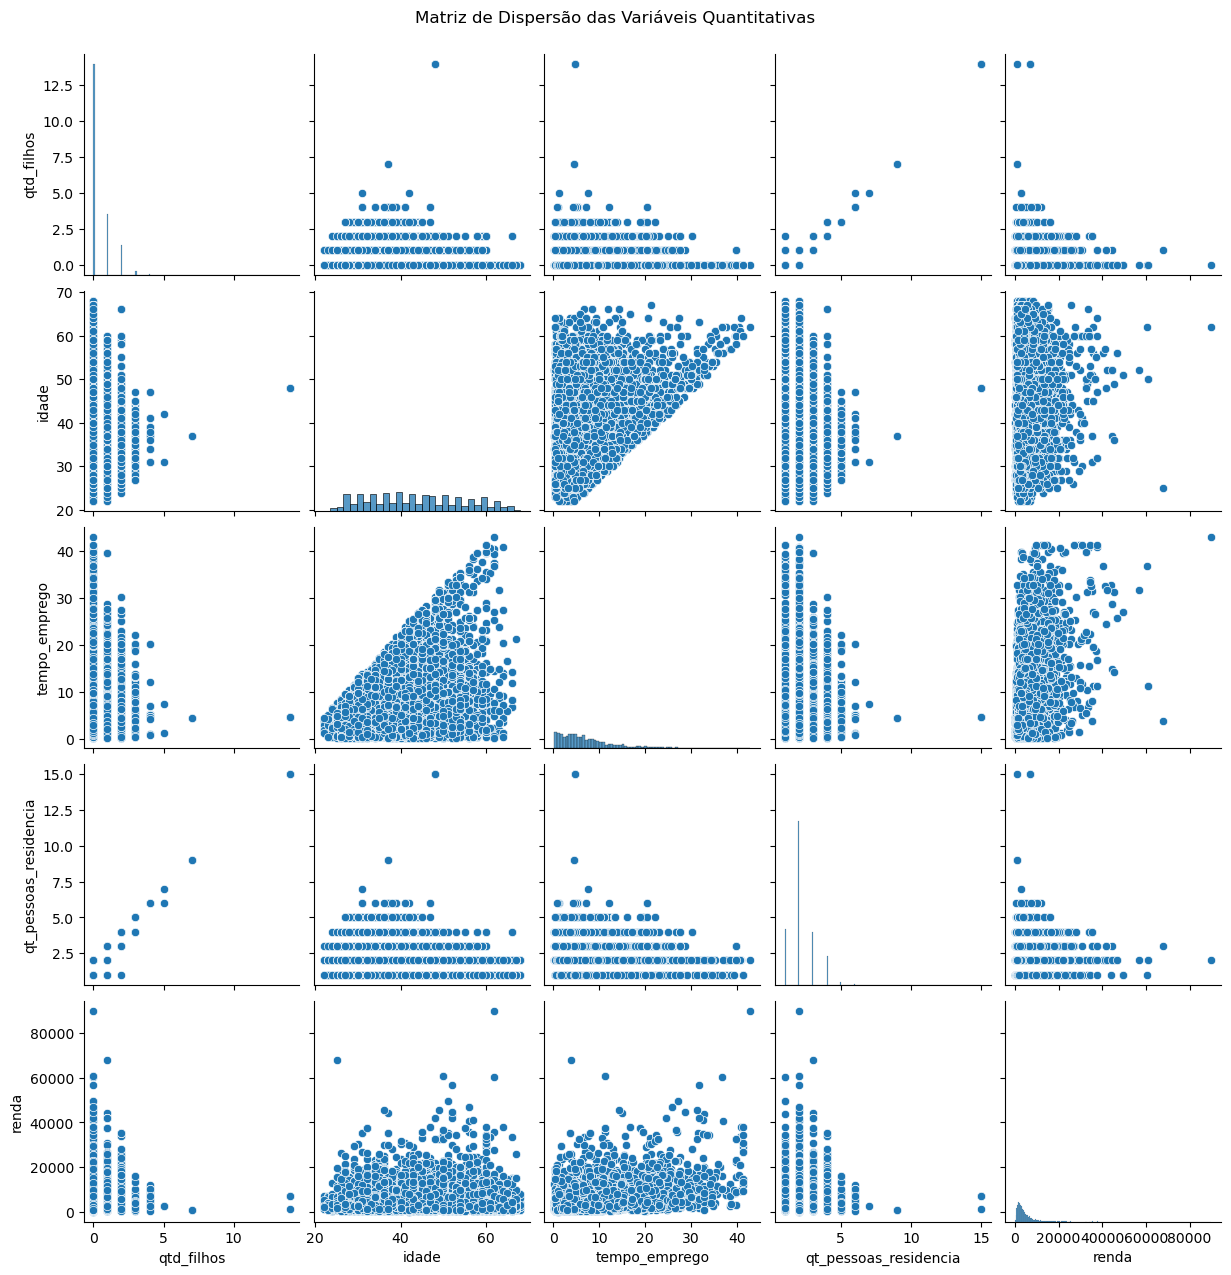


Gerando Matriz de Correlações (Heatmap)...


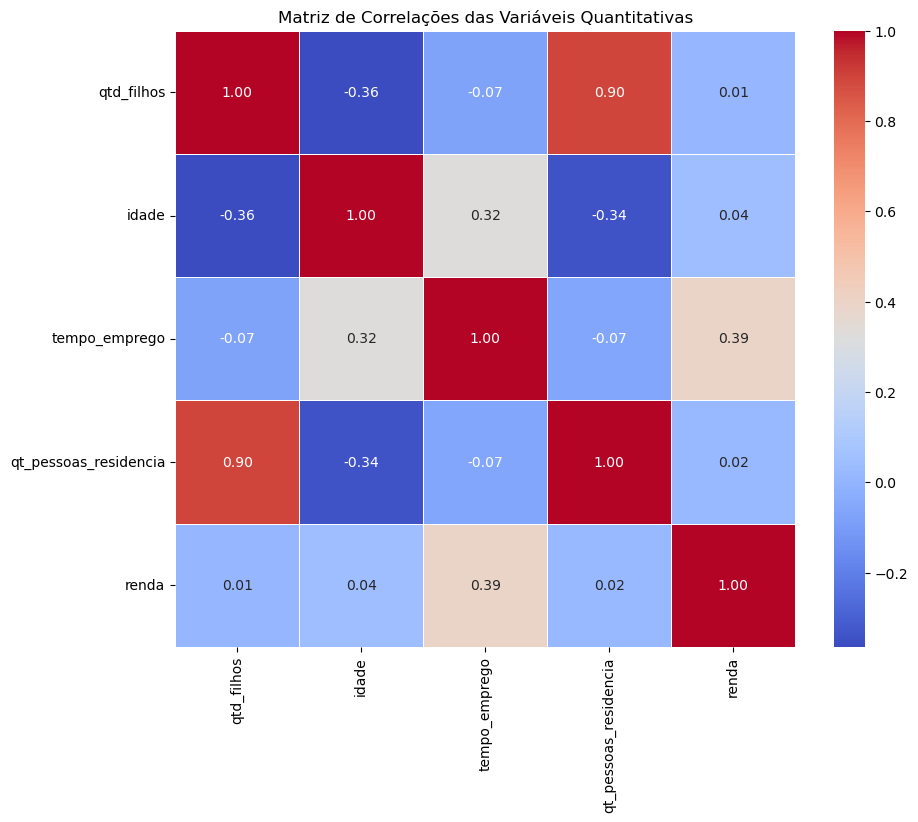

In [5]:
# Remover a coluna 'index' e a coluna de índice padrão do pandas, se existirem
# A coluna 'index' foi mencionada como um identificador de cliente, e o pd.read_csv pode adicionar uma coluna de índice automático.
# Vamos assumir que a primeira coluna não nomeada (geralmente gerada pelo pandas) e a coluna 'index' são irrelevantes para a correlação.
# df.columns.name is None for the default index column
df_quantitativas = df.select_dtypes(include=['number'])

# Identificar e remover a coluna de índice padrão do pandas se ela foi lida como uma coluna numérica sem nome específico
# e a coluna 'index' mencionada no problema.
if 'Unnamed: 0' in df_quantitativas.columns:
    df_quantitativas = df_quantitativas.drop(columns=['Unnamed: 0'])
if 'index' in df_quantitativas.columns:
    df_quantitativas = df_quantitativas.drop(columns=['index'])

# Avaliar a matriz de dispersão (Pairplot)
print("\nGerando Matriz de Dispersão (Pairplot)...")

# Filtra colunas com valores não nulos em 'renda' para o pairplot, se houver muitos NaNs que possam atrapalhar
df_for_pairplot = df_quantitativas.dropna(subset=['renda'])

# A variável 'renda' é o alvo, então a correlação com ela é o mais importante.
# O pairplot vai mostrar isso nas linhas e colunas correspondentes.
sns.pairplot(df_for_pairplot)
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas', y=1.02) # Ajusta o título para não sobrepor o gráfico
plt.show()

# Avaliar a matriz de correlações (Heatmap)
print("\nGerando Matriz de Correlações (Heatmap)...")
plt.figure(figsize=(10, 8))
sns.heatmap(df_quantitativas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlações das Variáveis Quantitativas')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

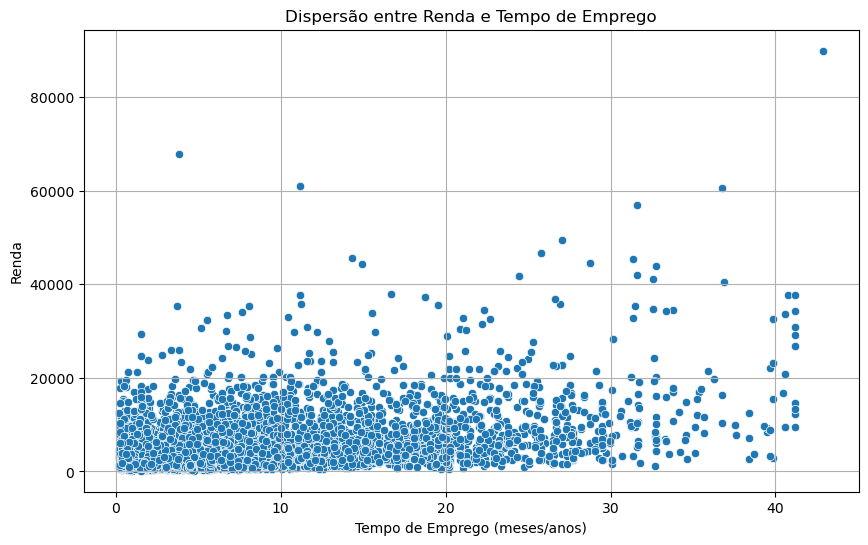

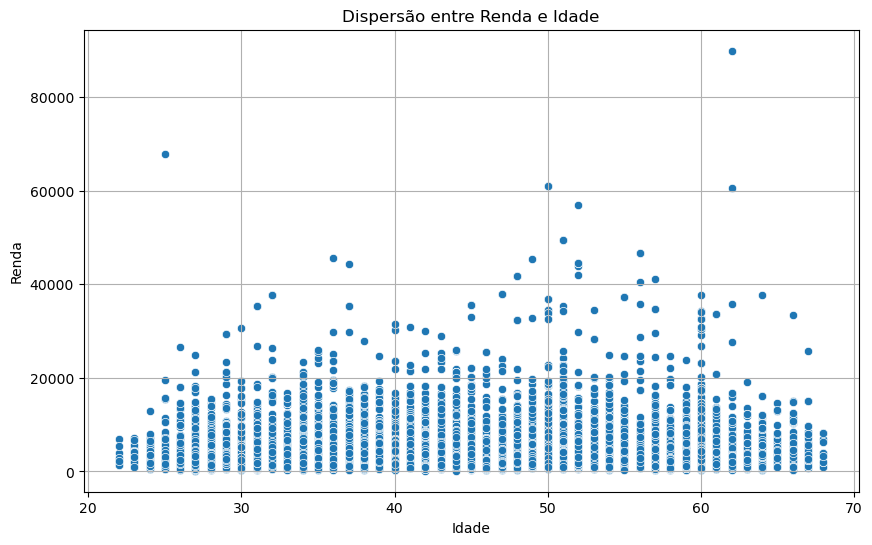

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que 'df' é o seu DataFrame já carregado
# Para garantir que temos o df, vou carregá-lo novamente (se você estiver rodando em um ambiente separado)
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'index' e a coluna de índice padrão do pandas, se existirem
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Avaliar um gráfico de dispersão (scatterplot) específico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df)
plt.title('Dispersão entre Renda e Tempo de Emprego')
plt.xlabel('Tempo de Emprego (meses/anos)') # Ajuste o label se souber a unidade exata
plt.ylabel('Renda')
plt.grid(True)
plt.show()

# Opcional: Se quiser ver o scatterplot para 'idade' vs. 'renda' também, mesmo com a correlação baixa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='renda', data=df)
plt.title('Dispersão entre Renda e Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

3) Na su aopinião, há outliers na variável renda?

In [17]:
#sim, é possivel ver no grafico alguns pontos que se destacam em relação a distribuição, isso é melhor explicado quando analizamos atravez da vizualização da media e mediana da renda

Total de registros com 'renda' não nula: 15000
Mediana da renda: R$ 3,278.26
Média da renda: R$ 4,624.63


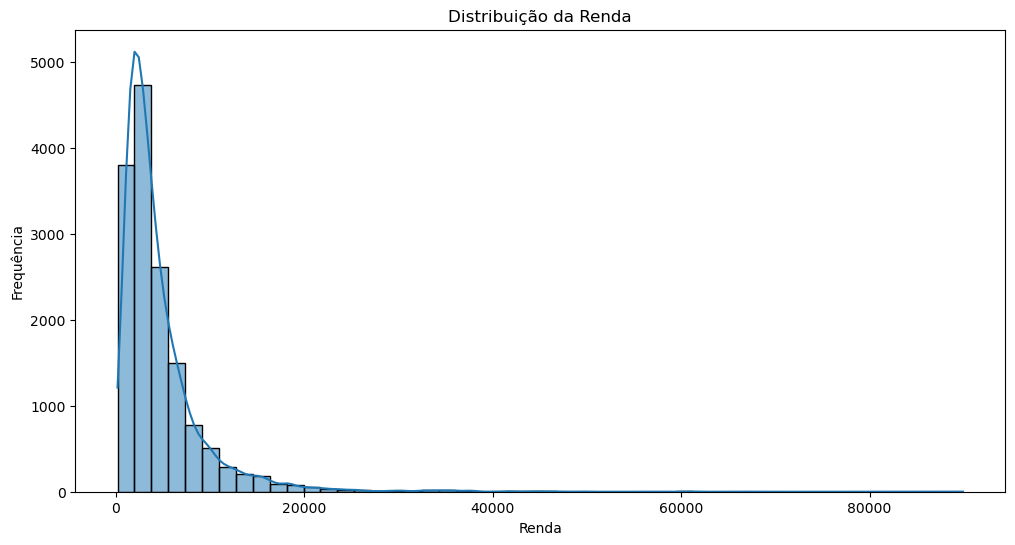

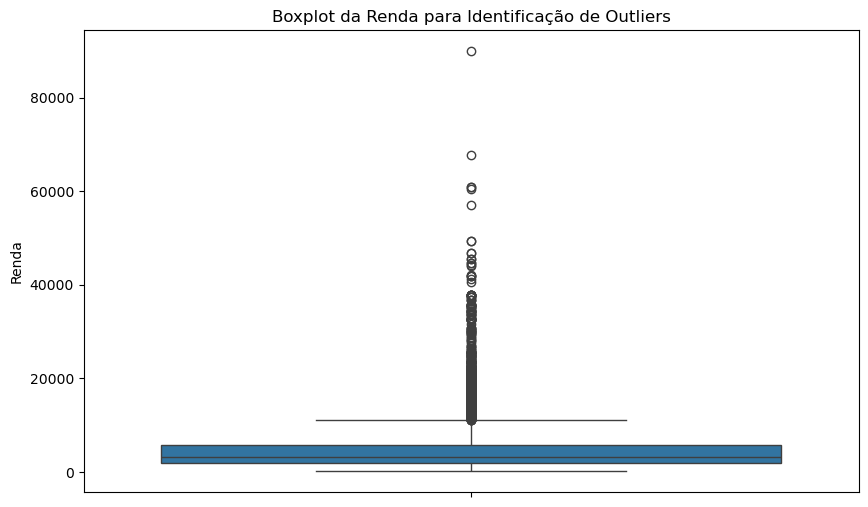


Primeiro Quartil (Q1): R$ 1,945.74
Terceiro Quartil (Q3): R$ 5,642.36
Intervalo Interquartil (IQR): R$ 3,696.62
Limite Superior para Outliers: R$ 11,187.30
Limite Inferior para Outliers: R$ -3,599.20

Número de Outliers Superiores: 1026
Número de Outliers Inferiores: 0

Exemplos de Rendas consideradas Outliers Superiores (Maiores que o Limite Superior):
9934     89918.04
113      67794.54
7078     60965.51
9028     60965.51
7765     60475.59
6772     56938.90
10533    49420.10
14341    49420.10
5452     46723.48
14531    46723.48
Name: renda, dtype: float64

Não há outliers inferiores de renda (o limite inferior pode ser negativo ou zero).


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset (garantindo que o df esteja disponível)
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'index' e a coluna de índice padrão do pandas, se existirem
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Remover valores nulos da coluna 'renda' para a análise
df_renda_validos = df.dropna(subset=['renda'])

print(f"Total de registros com 'renda' não nula: {len(df_renda_validos)}")
print(f"Mediana da renda: R$ {df_renda_validos['renda'].median():,.2f}")
print(f"Média da renda: R$ {df_renda_validos['renda'].mean():,.2f}")


# 1. Visualizar a distribuição da renda
plt.figure(figsize=(12, 6))
sns.histplot(df_renda_validos['renda'], kde=True, bins=50)
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

# 2. Identificar Outliers Graficamente com Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_renda_validos['renda'])
plt.title('Boxplot da Renda para Identificação de Outliers')
plt.ylabel('Renda')
plt.show()

# 3. Quantificar Outliers usando o método IQR
Q1 = df_renda_validos['renda'].quantile(0.25)
Q3 = df_renda_validos['renda'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_superiores = df_renda_validos[df_renda_validos['renda'] > limite_superior]
outliers_inferiores = df_renda_validos[df_renda_validos['renda'] < limite_inferior]

print(f"\nPrimeiro Quartil (Q1): R$ {Q1:,.2f}")
print(f"Terceiro Quartil (Q3): R$ {Q3:,.2f}")
print(f"Intervalo Interquartil (IQR): R$ {IQR:,.2f}")
print(f"Limite Superior para Outliers: R$ {limite_superior:,.2f}")
print(f"Limite Inferior para Outliers: R$ {limite_inferior:,.2f}") # Para renda, geralmente é 0 ou negativo

print(f"\nNúmero de Outliers Superiores: {len(outliers_superiores)}")
print(f"Número de Outliers Inferiores: {len(outliers_inferiores)}")

if not outliers_superiores.empty:
    print("\nExemplos de Rendas consideradas Outliers Superiores (Maiores que o Limite Superior):")
    print(outliers_superiores['renda'].nlargest(10)) # Mostra as 10 maiores rendas outliers
else:
    print("\nNão há outliers superiores de renda.")

if not outliers_inferiores.empty:
    print("\nExemplos de Rendas consideradas Outliers Inferiores (Menores que o Limite Inferior):")
    print(outliers_inferiores['renda'].nsmallest(10)) # Mostra as 10 menores rendas outliers
else:
    print("\nNão há outliers inferiores de renda (o limite inferior pode ser negativo ou zero).")

4) Calcule o logaritmo da variável renda e repita a sequência de análise

Renda mínima é 159.9. Usando np.log.

Total de registros com 'renda' não nula: 15000
Mediana da renda_log: 8.10
Média da renda_log: 8.11


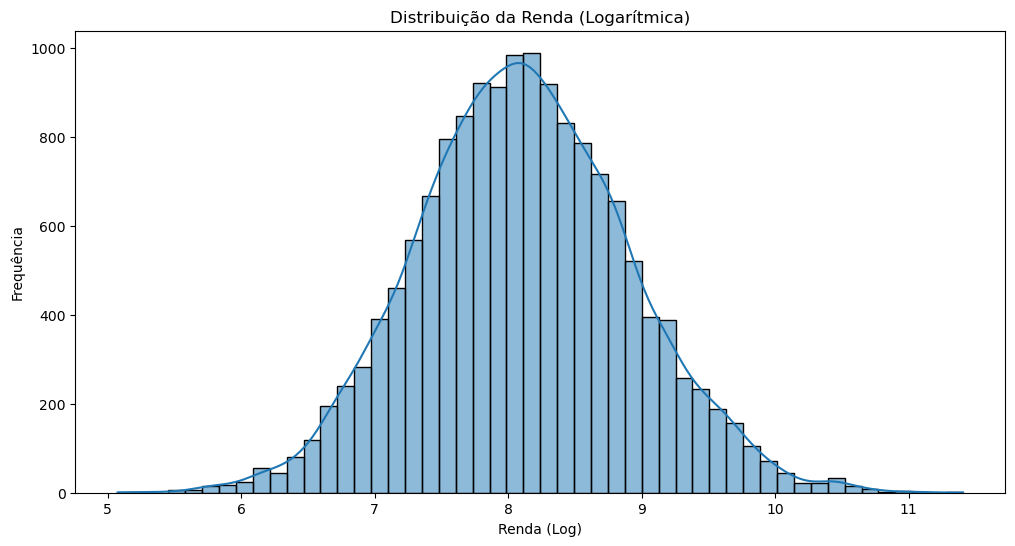

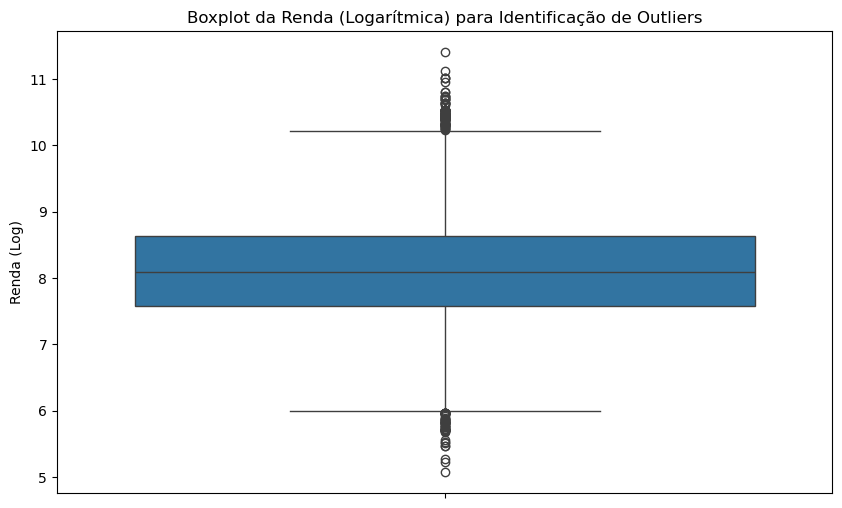


Primeiro Quartil (Q1) da renda_log: 7.57
Terceiro Quartil (Q3) da renda_log: 8.64
Intervalo Interquartil (IQR) da renda_log: 1.06
Limite Superior para Outliers da renda_log: 10.24
Limite Inferior para Outliers da renda_log: 5.98

Número de Outliers Superiores na renda_log: 92
Número de Outliers Inferiores na renda_log: 54

Exemplos de Rendas (Log) consideradas Outliers Superiores:
9934    11.406654
113     11.124237
7078    11.018064
9028    11.018064
7765    11.009995
Name: renda_log, dtype: float64

Corrigindo para a Renda Original desses outliers:
9934    89917.04
113     67793.54
7078    60964.51
9028    60964.51
7765    60474.59
Name: renda_log, dtype: float64

Exemplos de Rendas (Log) consideradas Outliers Inferiores:
9804     5.074549
12416    5.234792
14232    5.272230
2723     5.473866
6613     5.473866
Name: renda_log, dtype: float64

Corrigindo para a Renda Original desses outliers:
9804     158.90
12416    186.69
14232    193.85
2723     237.38
6613     237.38
Name: renda_

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset (garantindo que o df esteja disponível)
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'index' e a coluna de índice padrão do pandas, se existirem
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Remover valores nulos da coluna 'renda' para a análise
df_renda_validos = df.dropna(subset=['renda']).copy() # Adicionado .copy() para evitar SettingWithCopyWarning

# Calcular o logaritmo da renda
# É comum usar np.log1p (log(1+x)) para variáveis que podem ter 0,
# mas para renda geralmente assumimos valores > 0.
# No entanto, vamos verificar o mínimo da renda antes de decidir.
min_renda = df_renda_validos['renda'].min()
if min_renda <= 0:
    print(f"Renda mínima é {min_renda}. Usando np.log1p para lidar com zeros/negativos.")
    df_renda_validos['renda_log'] = np.log1p(df_renda_validos['renda'])
else:
    print(f"Renda mínima é {min_renda}. Usando np.log.")
    df_renda_validos['renda_log'] = np.log(df_renda_validos['renda'])

print(f"\nTotal de registros com 'renda' não nula: {len(df_renda_validos)}")
print(f"Mediana da renda_log: {df_renda_validos['renda_log'].median():,.2f}")
print(f"Média da renda_log: {df_renda_validos['renda_log'].mean():,.2f}")


# 1. Visualizar a distribuição da renda_log
plt.figure(figsize=(12, 6))
sns.histplot(df_renda_validos['renda_log'], kde=True, bins=50)
plt.title('Distribuição da Renda (Logarítmica)')
plt.xlabel('Renda (Log)')
plt.ylabel('Frequência')
plt.show()

# 2. Identificar Outliers Graficamente com Boxplot da renda_log
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_renda_validos['renda_log'])
plt.title('Boxplot da Renda (Logarítmica) para Identificação de Outliers')
plt.ylabel('Renda (Log)')
plt.show()

# 3. Quantificar Outliers usando o método IQR para renda_log
Q1_log = df_renda_validos['renda_log'].quantile(0.25)
Q3_log = df_renda_validos['renda_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log

limite_inferior_log = Q1_log - 1.5 * IQR_log
limite_superior_log = Q3_log + 1.5 * IQR_log

outliers_superiores_log = df_renda_validos[df_renda_validos['renda_log'] > limite_superior_log]
outliers_inferiores_log = df_renda_validos[df_renda_validos['renda_log'] < limite_inferior_log]

print(f"\nPrimeiro Quartil (Q1) da renda_log: {Q1_log:,.2f}")
print(f"Terceiro Quartil (Q3) da renda_log: {Q3_log:,.2f}")
print(f"Intervalo Interquartil (IQR) da renda_log: {IQR_log:,.2f}")
print(f"Limite Superior para Outliers da renda_log: {limite_superior_log:,.2f}")
print(f"Limite Inferior para Outliers da renda_log: {limite_inferior_log:,.2f}")

print(f"\nNúmero de Outliers Superiores na renda_log: {len(outliers_superiores_log)}")
print(f"Número de Outliers Inferiores na renda_log: {len(outliers_inferiores_log)}")

if not outliers_superiores_log.empty:
    print("\nExemplos de Rendas (Log) consideradas Outliers Superiores:") # Linha corrigida
    print(outliers_superiores_log['renda_log'].nlargest(5))
    print("\nCorrigindo para a Renda Original desses outliers:")
    print(np.expm1(outliers_superiores_log['renda_log'].nlargest(5))) # Use expm1 se usou log1p, exp se usou log
else:
    print("\nNão há outliers superiores na renda_log.")

if not outliers_inferiores_log.empty:
    print("\nExemplos de Rendas (Log) consideradas Outliers Inferiores:") # Linha corrigida (a que estava no erro)
    print(outliers_inferiores_log['renda_log'].nsmallest(5))
    print("\nCorrigindo para a Renda Original desses outliers:")
    print(np.expm1(outliers_inferiores_log['renda_log'].nsmallest(5))) # Use expm1 se usou log1p, exp se usou log
else:
    print("\nNão há outliers inferiores na renda_log.")

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [23]:
#usar o logaritmo na renda ajudou bastante na análise. Ele faz os dados ficarem mais "arrumadinhos" e diminui o peso daqueles valores muito altos (os 'fora da curva'). Com isso, fica bem melhor pra criar modelos que preveem as coisas direitinho. O único "porém" é que, pra entender os números depois do log, você precisa fazer uma continha inversa, mas no fim das contas, os ganhos pra análise valem super a pena.